In [12]:
# imports 
from empath import Empath
lexicon = Empath()
import pandas as  pd
import matplotlib.pyplot as plt

## Steps for feature analysis aka violence metric


1. Take advantage of Empath package to obtain categories representatives of violence
    - a. Produce clean data locally thanks to results 
    - b. Preprocess as did in the paper to train Empath to ensure alignment with features found 
    - c. Perform Empath.lexicon.analyse with word counts, sorted_list (gives out cosine similarity between the vector of the category and the vector of the text given (need to reread that in paper))

2. Identify the most represented categories in the plot per genre, per year
3. Identify the most represented categories per movies classified as violent per ChatGPT 
4. Balance the frequencies of the words per their weight //TFID-matrix 
5. Our own logistic regression model : stantardise/normalise the train, test data 
6. Transform our plots in bags of words 
7. Side quest: Perform clustering on bags of words (idea: does it appear by itself group of violent movies)
8. Visualisation of number of words per movies, per genres 
9. If skewed, try logarithm and see if it becomes gaussian -> fit with logarithm 
10. Our own model : have p-value
Idea : try to replicate chatgpt predictions and explain them 

In [13]:
# Manual selection of hypothesised relevant categories 
categories = [
    "monster", "weapon", "negative_emotion", "pain", "terrorism", "breaking", 
    "disappointment", "anger", "torment", "shame", "emotional", "sadness", 
    "rage", "injury", "fire", "disgust", "war", "dominant_personality", 
    "fight", "deception", "neglect", "dominant_heirarchical", "violence"
]

for category in categories: 
    # Manual inspection of the words associated with all pre-build categories 
    print("Category =" + category, lexicon.cats.get(category))

Category =monster ['unstoppable', 'danger', 'devil', 'demon', 'cursed', 'beast', 'undead', 'wolf', 'evil', 'mutated', 'superpower', 'mythical', 'ferocious', 'ravenous', 'fearsome', 'immortal', 'foe', 'hunter', 'savage', 'mutate', 'transformation', 'demonic', 'legendary', 'witch', 'superhuman', 'reincarnation', 'rogue', 'feral', 'supernatural', 'feared', 'bloodthirsty', 'rabid', 'lore', 'terrorize', 'myth', 'underworld', 'monstrous', 'mutant', 'extinct', 'fable', 'monster', 'predator', 'sighting', 'hybrid', 'vicious', 'werewolf', 'legend', 'vampire', 'creature', 'alien', 'inhuman', 'hunt', 'deadly', 'mythological', 'mutation', 'enemy', 'extraterrestrial', 'abomination', 'ruthless', 'folklore', 'mystical', 'dragon', 'parasite', 'villain']
Category =weapon ['bomb', 'loaded', 'weaponry', 'kill', 'ammunition', 'gunpoint', 'grenade', 'explosive', 'archery', 'casing', 'shrapnel', 'hatchet', 'disarm', 'razor', 'baton', 'shoot', 'butcher', 'knife', 'assailant', 'gunpowder', 'sword', 'wield', 'm

In [14]:
clean_data =pd.read_csv("../data/CLEAN/Movie_Data_clean.tsv",sep="\t")

# Genres extraction 

Analysis of error occuring when applying the genres extraction

In [15]:
df = clean_data.astype({'Genres':'string'}) # Ensure string type to perform string pre-processing
data_no_nan = clean_data[clean_data.Genres.isna()] # Movies that have no genres associated

In [16]:
print("There are {} movies that don't have a genre associated".format(len(data_no_nan)))

There are 13 movies that don't have a genre associated


In [17]:
def genres_extraction (y):
 test =[element for element in y.split(",")]
 return test


In [18]:
filtered_data =clean_data.Genres.dropna() # Keep only movies that have a genre 
genres = filtered_data.apply(genres_extraction)
from itertools import chain
merged_list = list(chain.from_iterable(genres.values))
unique_values =set(merged_list)
unique_genres = set([element.strip() for element in unique_values])
len(unique_genres)


333

In [19]:
test =clean_data[clean_data["Movie name"]=="Ghosts of Mars"]
test.Genres = test.Genres.apply(genres_extraction)
test.explode(column="Genres")

/tmp/ipykernel_20012/3214770805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Genres = test.Genres.apply(genres_extraction)


,Wikipedia movie ID,Movie name,Release date,Box office revenue,Languages,Countries,Genres,Plot
0,975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,Thriller,"set in the second half of the 22nd century, th..."
0,975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,Science Fiction,"set in the second half of the 22nd century, th..."
0,975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,Horror,"set in the second half of the 22nd century, th..."
0,975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,Adventure,"set in the second half of the 22nd century, th..."
0,975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,Supernatural,"set in the second half of the 22nd century, th..."
0,975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,Action,"set in the second half of the 22nd century, th..."
0,975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,Space western,"set in the second half of the 22nd century, th..."


In [20]:
import seaborn as sns

/tmp/ipykernel_20012/814920715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.Genres = filtered_data.Genres.apply(genres_extraction)
/tmp/ipykernel_20012/814920715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Year"] = [element[:4] for element in filtered_data["Release date"]]
/home/jen/.local/share/mamba/envs/ADA_project/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  

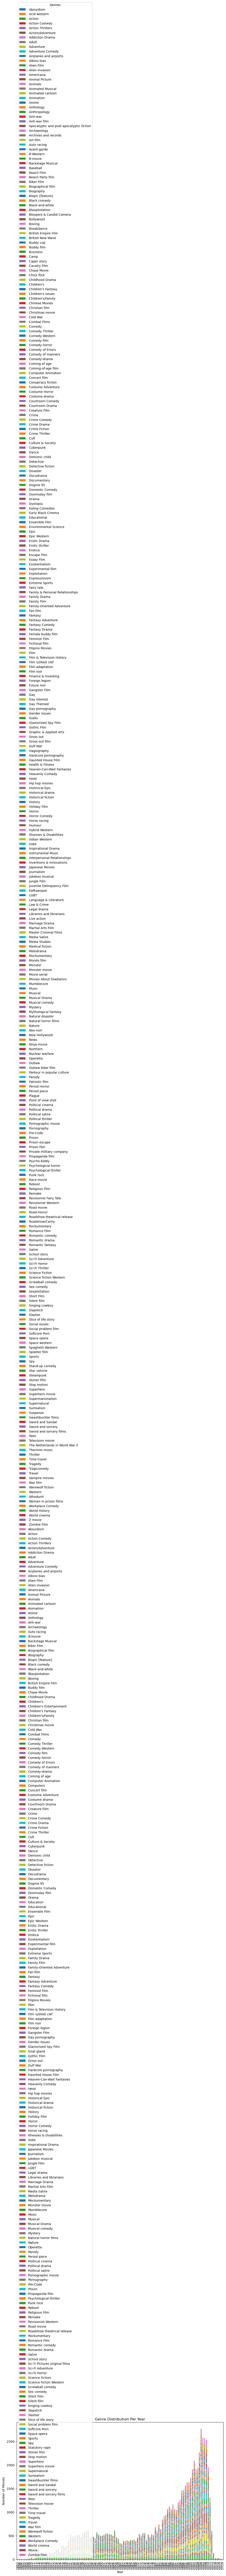

In [22]:
mask = pd.notna(clean_data['Genres'])
filtered_data = clean_data[mask]
filtered_data.Genres = filtered_data.Genres.apply(genres_extraction)
filtered_data["Year"] = [element[:4] for element in filtered_data["Release date"]]


data_genre_exploded = filtered_data.explode("Genres")
genre_distribution =data_genre_exploded.groupby(["Year","Genres"]).size().reset_index(name='count')

# Step 4: Pivot for easier plotting
genre_pivot = genre_distribution.pivot(index='Year', columns='Genres', values='count').fillna(0)

# Step 5: Plot
genre_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Genre Distribution Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genres')
plt.show()